# 多层神经网络

In [48]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

# matplotlib inline 是一个魔法函数（Magic Functions）。
# 官方给出的定义是：IPython有一组预先定义好的所谓的魔法函数（Magic Functions），你可以通过命令行的语法

In [49]:
def plot_decision_boundary(model, x, y):
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1# 列表中最大值加一，最小值减一
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    h = 0.01# 下面的 arange的步长
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # plt.plot(xx,yy)，形成一个彩色竖线图
    
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

In [50]:
np.random.seed(1)
m = 400 # 样本数量
N = int(m/2) # 每一类的点的个数
D = 2 # 维度
x = np.zeros((m, D))
y = np.zeros((m, 1), dtype='uint8') # label 向量，0 表示红色，1 表示蓝色
a = 4

In [51]:
for j in range(2):
    ix = range(N*j,N*(j+1))# 确定数组容量
    t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta θ
    r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
    x[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

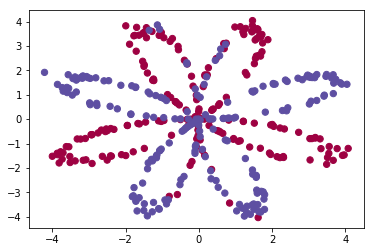

In [52]:
plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

我们可以先尝试用 logistic 回归来解决这个问题

In [24]:
m = 400 # 样本数量
N = int(m/2) # 每一类的点的个数
D = 2 # 维度
x = np.zeros((m, D))
y = np.zeros((m, 1), dtype='uint8') # label 向量，0 表示红色，1 表示蓝色
a = 4
for j in range(2):
    ix = range(N*j,N*(j+1))
    print('第{}次 ix :'.format(j))
    print(ix)
    
    t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
    print('第{}次 t :'.format(j))
    print(t)
    
    r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
    print('第{}次 r :'.format(j))
    print(r.size)
    
    x[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    print('第{}次 x[ix] :'.format(j))
    print(x[ix])
    
    y[ix] = j
    print('第{}次 y[ix] :'.format(j))
    print(y[ix])

第0次 ix :
range(0, 200)
第0次 t :
[ 0.32486907 -0.10667289 -0.07427757 -0.16755855  0.23579509 -0.38191578
  0.4430327  -0.04249264  0.18923495  0.09123145  0.44920551 -0.23956583
  0.12365726  0.12700822  0.44625138  0.01519763  0.21636863  0.09096098
  0.2906538   0.41445249  0.093444    0.55819097  0.52524277  0.46110188
  0.5564526   0.25521423  0.38306015  0.2361627   0.38541736  0.56074446
  0.33201961  0.40667945  0.364274    0.34834581  0.3988161   0.5462108
  0.34096004  0.62698364  0.92773933  0.75986612  0.58876857  0.46528828
  0.5090608   1.01266177  0.7000108   0.57812851  0.75938913  1.15693545
  0.7765946   0.89168183  0.84395366  0.72914802  0.58677274  0.76108623
  0.80485432  0.9796362   1.04578663  1.07988876  0.9664642   1.10205336
  0.78982393  1.20695554  1.07464627  0.92812013  1.10112071  1.00398113
  1.26109975  1.35441562  1.50324573  0.80250978  0.80866468  1.01227266
  1.16085163  1.3197564   1.22332799  0.77143915  1.13031699  1.37283111
  1.26893352  1.39099

xx_shape (210, 223)
[[-0.58911508 -0.55936913]
 [-0.57911508 -0.55936913]
 [-0.56911508 -0.55936913]
 ..., 
 [ 1.61088492  1.53063087]
 [ 1.62088492  1.53063087]
 [ 1.63088492  1.53063087]]


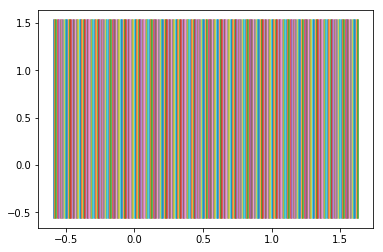

In [18]:
x = np.random.rand(3,4)
x = np.random.rand(2,4)
# Set min and max values and give it some padding
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1# 列表中最大值加一，最小值减一
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
h = 0.01# 下面的 arange的步长
    
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))# 形成一个点阵图 长y_max-y_min,宽x_max-x_min
# print('xx\n',xx)
# print('\nyy\n',yy)
print('xx_shape',xx.shape)
plt.plot(xx,yy)

nc = np.c_[xx.ravel(), yy.ravel()]
print(nc)

In [45]:
y = np.zeros((m, 1), dtype='uint8')
print(y.reshape(-1))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

# matplotlib inline 是一个魔法函数（Magic Functions）。
# 官方给出的定义是：IPython有一组预先定义好的所谓的魔法函数（Magic Functions），你可以通过命令行的语法

# 神经网络的两种搭建方式

In [2]:
"""
View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
torch: 0.1.11
"""
import torch
import torch.nn.functional as F


# replace following class code with an easy sequential network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net1 = Net(1, 10, 1)

# easy and fast way to build your network
net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)

In [3]:
print(net1)     # net1 architecture
"""
Net (
  (hidden): Linear (1 -> 10)
  (predict): Linear (10 -> 1)
)
"""

print(net2)     # net2 architecture
"""
Sequential (
  (0): Linear (1 -> 10)
  (1): ReLU ()
  (2): Linear (10 -> 1)
)
"""

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


'\nSequential (\n  (0): Linear (1 -> 10)\n  (1): ReLU ()\n  (2): Linear (10 -> 1)\n)\n'